In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA

import plotly.express as px

In [2]:
data = pd.read_csv("/content/CC GENERAL.csv")

In [3]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [4]:
data.isnull().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
CUST_ID                               0
BALANCE                               0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
TENURE                                0
dtype: int64

In [5]:
def outlier_percent(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    minimum = Q1 - (1.7 * IQR)
    maximum = Q3 + (1.7 * IQR)
    num_outliers =  np.sum((data < minimum) |(data > maximum))
    num_total = data.count()
    return (num_outliers/num_total)*100

In [6]:
noncat_data = data.drop(['CUST_ID', "TENURE"], axis=1)
for column in noncat_data.columns:
    df = noncat_data[column]
    percent = str(round(outlier_percent(df), 2))
    print(f'Outliers in "{column}": {percent}%')

Outliers in "BALANCE": 6.67%
Outliers in "BALANCE_FREQUENCY": 16.51%
Outliers in "PURCHASES": 8.15%
Outliers in "ONEOFF_PURCHASES": 10.36%
Outliers in "INSTALLMENTS_PURCHASES": 8.63%
Outliers in "CASH_ADVANCE": 10.21%
Outliers in "PURCHASES_FREQUENCY": 0.0%
Outliers in "ONEOFF_PURCHASES_FREQUENCY": 8.67%
Outliers in "PURCHASES_INSTALLMENTS_FREQUENCY": 0.0%
Outliers in "CASH_ADVANCE_FREQUENCY": 4.01%
Outliers in "CASH_ADVANCE_TRX": 8.98%
Outliers in "PURCHASES_TRX": 7.71%
Outliers in "CREDIT_LIMIT": 2.08%
Outliers in "PAYMENTS": 8.23%
Outliers in "MINIMUM_PAYMENTS": 8.65%
Outliers in "PRC_FULL_PAYMENT": 15.97%


In [7]:
for column in noncat_data.columns:
    data_outlier = noncat_data[column]    
    Q1 = data_outlier.quantile(0.25)
    Q3 = data_outlier.quantile(0.75)
    IQR = Q3 - Q1
    minimum = Q1 - (1.7 * IQR)
    maximum = Q3 + (1.7 * IQR)
 
    outliers = ((data_outlier < minimum) |(data_outlier > maximum))
    noncat_data[column].loc[outliers] = np.nan
    
noncat_data.isna().sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


BALANCE                              597
BALANCE_FREQUENCY                   1478
PURCHASES                            729
ONEOFF_PURCHASES                     927
INSTALLMENTS_PURCHASES               772
CASH_ADVANCE                         914
PURCHASES_FREQUENCY                    0
ONEOFF_PURCHASES_FREQUENCY           776
PURCHASES_INSTALLMENTS_FREQUENCY       0
CASH_ADVANCE_FREQUENCY               359
CASH_ADVANCE_TRX                     804
PURCHASES_TRX                        690
CREDIT_LIMIT                         187
PAYMENTS                             737
MINIMUM_PAYMENTS                    1060
PRC_FULL_PAYMENT                    1429
dtype: int64

In [8]:
creditdata = noncat_data.dropna()

In [9]:
creditdata.shape

(3655, 16)

In [10]:
imputer = KNNImputer()
imp_data = pd.DataFrame(imputer.fit_transform(noncat_data), columns=noncat_data.columns)
imp_data.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64

In [11]:
scale = StandardScaler()
data_scale = scale.fit_transform(imp_data)
data_scale = normalize(data_scale)
data_scale = pd.DataFrame(data_scale)

In [12]:
data_scale.columns = imp_data.columns

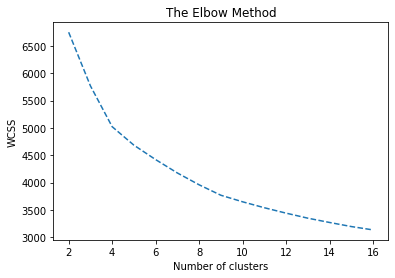

In [13]:
wcss=[]
for i in range(2,17):
    kmeans=KMeans(n_clusters=i, init="k-means++",random_state=42)
    kmeans.fit(data_scale)
    wcss.append(kmeans.inertia_)
plt.plot(range(2,17),wcss, '--')
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

Parameter: {'n_clusters': 3} Score 0.20524354254634553
Parameter: {'n_clusters': 4} Score 0.20716207628199745
Parameter: {'n_clusters': 5} Score 0.20077582815715983
Parameter: {'n_clusters': 6} Score 0.18539947695139716
Parameter: {'n_clusters': 7} Score 0.19368159854272934
Parameter: {'n_clusters': 8} Score 0.19444439896655427
Parameter: {'n_clusters': 9} Score 0.20163194994378997


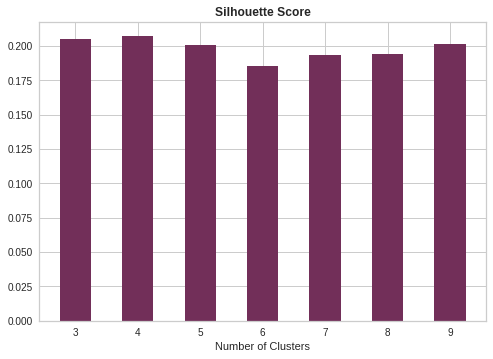

{'n_clusters': 4}


In [14]:
from sklearn.model_selection import ParameterGrid
from yellowbrick.cluster import SilhouetteVisualizer
import sklearn.metrics as metrics

parameters = [3,4,5,6,7,8,9]
# instantiating ParameterGrid, pass number of clusters as input
parameter_grid = ParameterGrid({'n_clusters': parameters})
best_score = -1
kmeans_model = KMeans()     # instantiating KMeans model
silhouette_scores = []
# evaluation based on silhouette_score
for p in parameter_grid:
    kmeans_model.set_params(**p)    # set current hyper parameter
    kmeans_model.fit(data_scale)          # fit model on wine dataset, this will find clusters based on parameter p
    ss = metrics.silhouette_score(data_scale, kmeans_model.labels_)   # calculate silhouette_score
    silhouette_scores += [ss]       # store all the scores
    print('Parameter:', p, 'Score', ss)
    # check p which has the best score
    if ss > best_score:
        best_score = ss
        best_grid = p
# plotting silhouette score
plt.bar(range(len(silhouette_scores)), list(silhouette_scores), align='center', color='#722f59', width=0.5)
plt.xticks(range(len(silhouette_scores)), list(parameters))
plt.title('Silhouette Score', fontweight='bold')
plt.xlabel('Number of Clusters')
plt.show()
print(best_grid)

In [15]:
kmeans = KMeans(n_clusters = best_grid["n_clusters"],random_state=42)
kmeans.fit(data_scale)
labels=kmeans.labels_
labels = pd.DataFrame(labels)
print('Modelimin Silhouette skoru ' + str(best_score))

Modelimin Silhouette skoru 0.20716207628199745


In [16]:
y_kmeans = kmeans.predict(data_scale)

In [17]:
"""
data_scale[y_kmeans==0].head()
data_scale[y_kmeans==1].head()
data_scale[y_kmeans==2].head()
data_scale[y_kmeans==3].head()
"""

'\ndata_scale[y_kmeans==0].head()\ndata_scale[y_kmeans==1].head()\ndata_scale[y_kmeans==2].head()\ndata_scale[y_kmeans==3].head()\n'

In [18]:
clusters=pd.concat([data_scale, pd.DataFrame({'cluster':kmeans.labels_})], axis=1)
clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,cluster
0,-0.233922,-0.659321,-0.192802,-0.171304,-0.116836,-0.168617,-0.205116,-0.187916,-0.179892,-0.186224,-0.174561,-0.196040,-0.263942,-0.247489,-0.211049,-0.114851,1
1,0.272889,-0.207173,-0.167141,-0.125909,-0.144706,0.243353,-0.228388,-0.138119,-0.171418,0.166871,0.163206,-0.177691,0.154522,0.517496,0.230277,0.476736,2
2,0.250934,0.101687,0.056399,0.385795,-0.209443,-0.179378,0.343574,0.574702,-0.248106,-0.198110,-0.185703,0.034613,0.265689,-0.154234,0.067162,-0.122182,3
3,0.068697,0.084961,0.281107,0.767878,-0.174993,-0.089524,-0.229253,-0.086128,-0.207296,-0.043084,-0.067027,-0.194565,0.221987,-0.263729,0.066064,-0.102084,3
4,-0.118545,0.132962,-0.308250,-0.222918,-0.273862,-0.234550,-0.358779,-0.134789,-0.324416,-0.259043,-0.242820,-0.304493,-0.345164,-0.182581,-0.211255,-0.159761,1


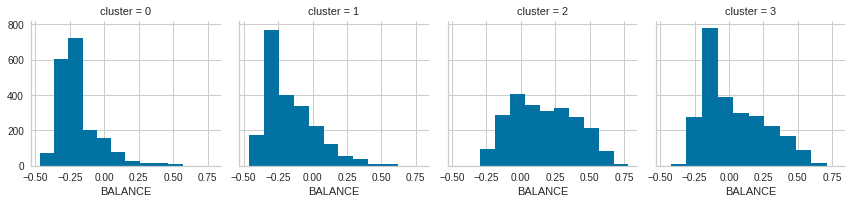

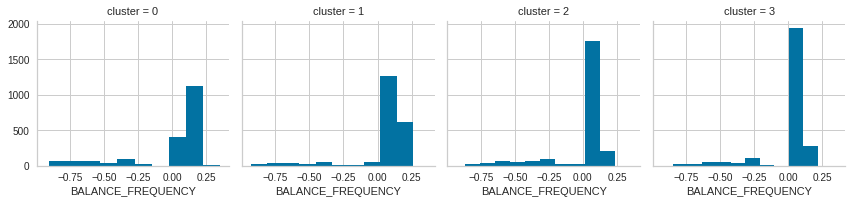

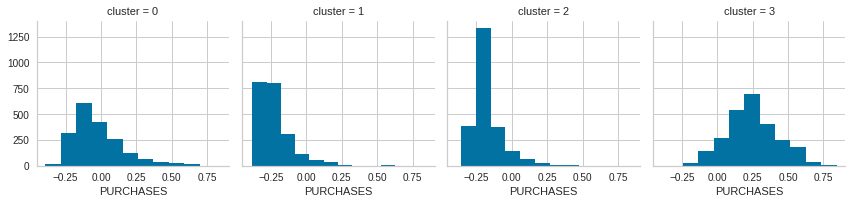

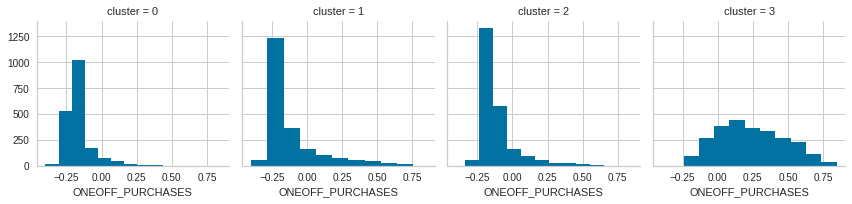

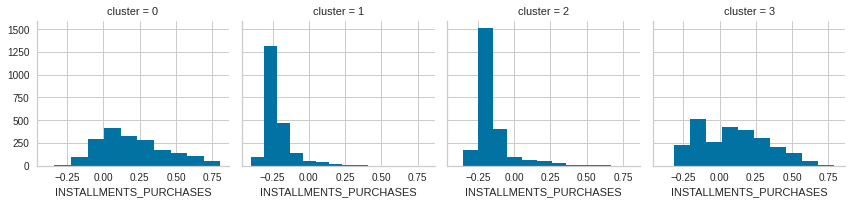

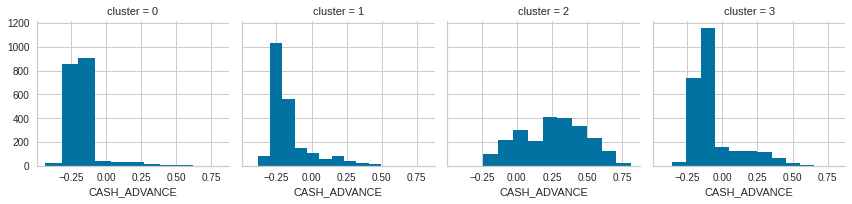

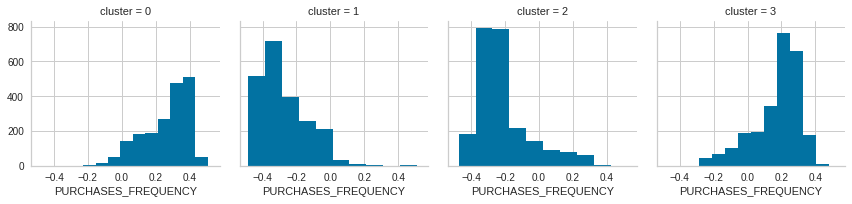

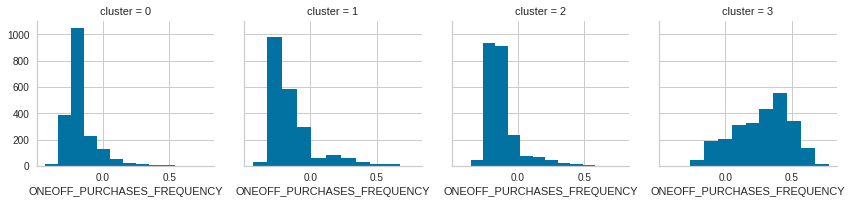

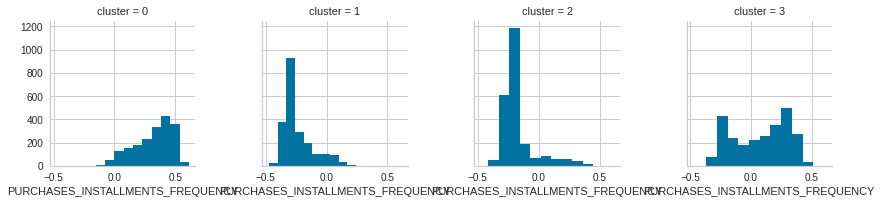

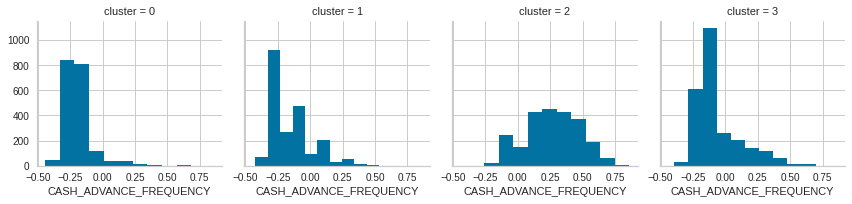

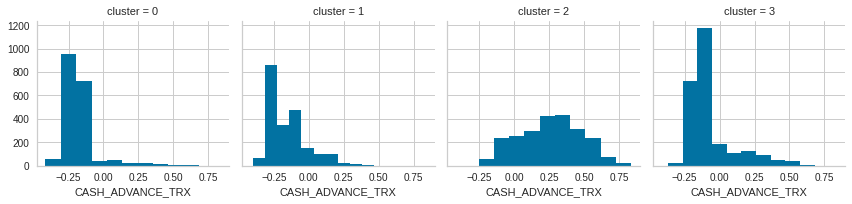

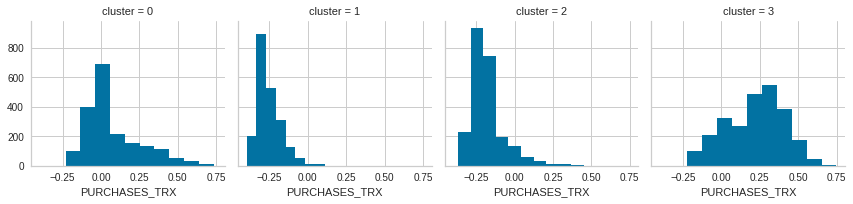

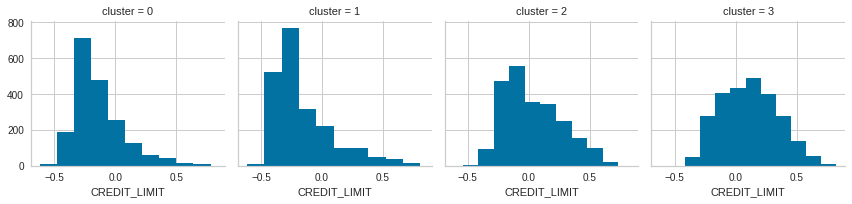

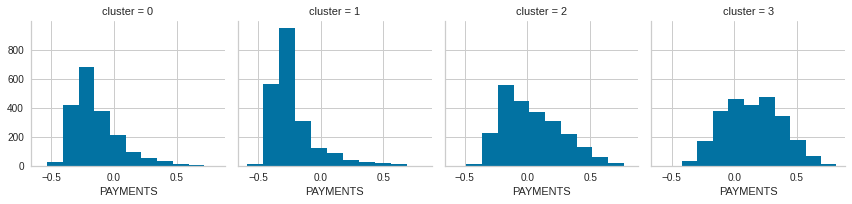

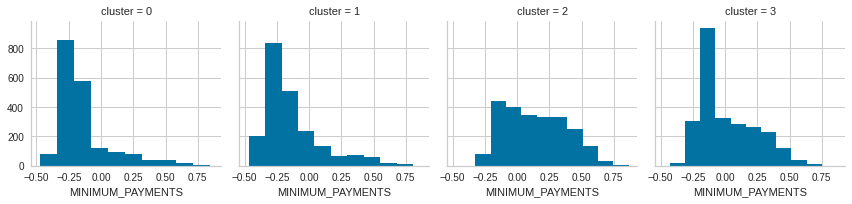

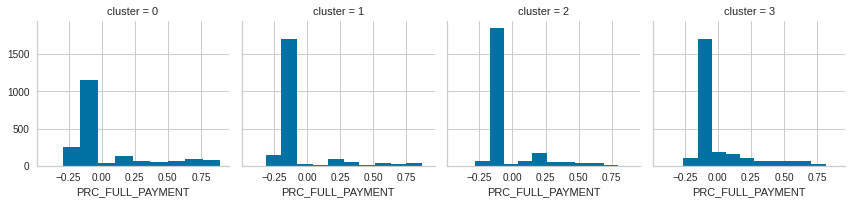

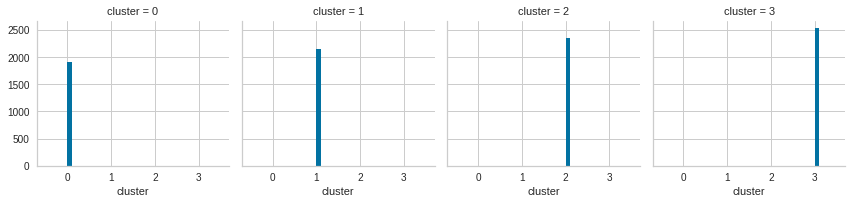

In [19]:
for c in clusters:  
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)

In [20]:
pca_n = PCA(n_components = 2, random_state = 42) 
X_principal = pca_n.fit_transform(data_scale)
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 

In [21]:
X_principal

,P1,P2
0,-0.317046,-0.546089
1,-0.371284,0.626472
2,0.362088,0.232069
3,-0.039067,0.189424
4,-0.559354,-0.606123
...,...,...
8945,0.271293,-0.733149
8946,0.262671,-0.674325
8947,0.109441,-0.460095
8948,-0.373004,-0.314647


In [22]:
data_scale['cluster_id'] = kmeans.labels_

In [23]:
cluster = data_scale.copy(deep=True).filter(['cluster_id'])
forvisual = pd.merge(X_principal, cluster, left_index=True, right_index=True)

In [24]:
print("1.Kümede bulunan müşteri sayısı:" + str(data_scale[y_kmeans==0].cluster_id.count()))
print("2.Kümede bulunan müşteri sayısı:" + str(data_scale[y_kmeans==1].cluster_id.count()))
print("3.Kümede bulunan müşteri sayısı:" + str(data_scale[y_kmeans==2].cluster_id.count()))
print("4.Kümede bulunan müşteri sayısı:" + str(data_scale[y_kmeans==3].cluster_id.count()))

1.Kümede bulunan müşteri sayısı:1904
2.Kümede bulunan müşteri sayısı:2146
3.Kümede bulunan müşteri sayısı:2357
4.Kümede bulunan müşteri sayısı:2543


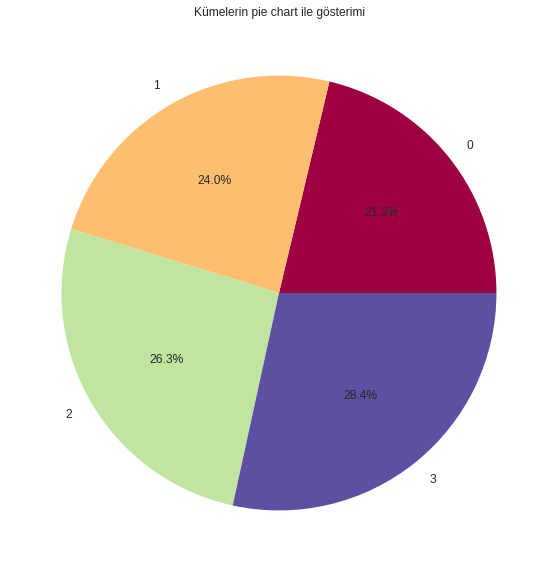

In [25]:
pasta = X_principal.groupby([
                data_scale['cluster_id']]).size()
plot = pasta.plot.pie(y='cluster_id', figsize=(10, 10), 
                      title="Kümelerin pie chart ile gösterimi",
                      autopct='%1.1f%%', ylabel="", colormap="Spectral", fontsize=12)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


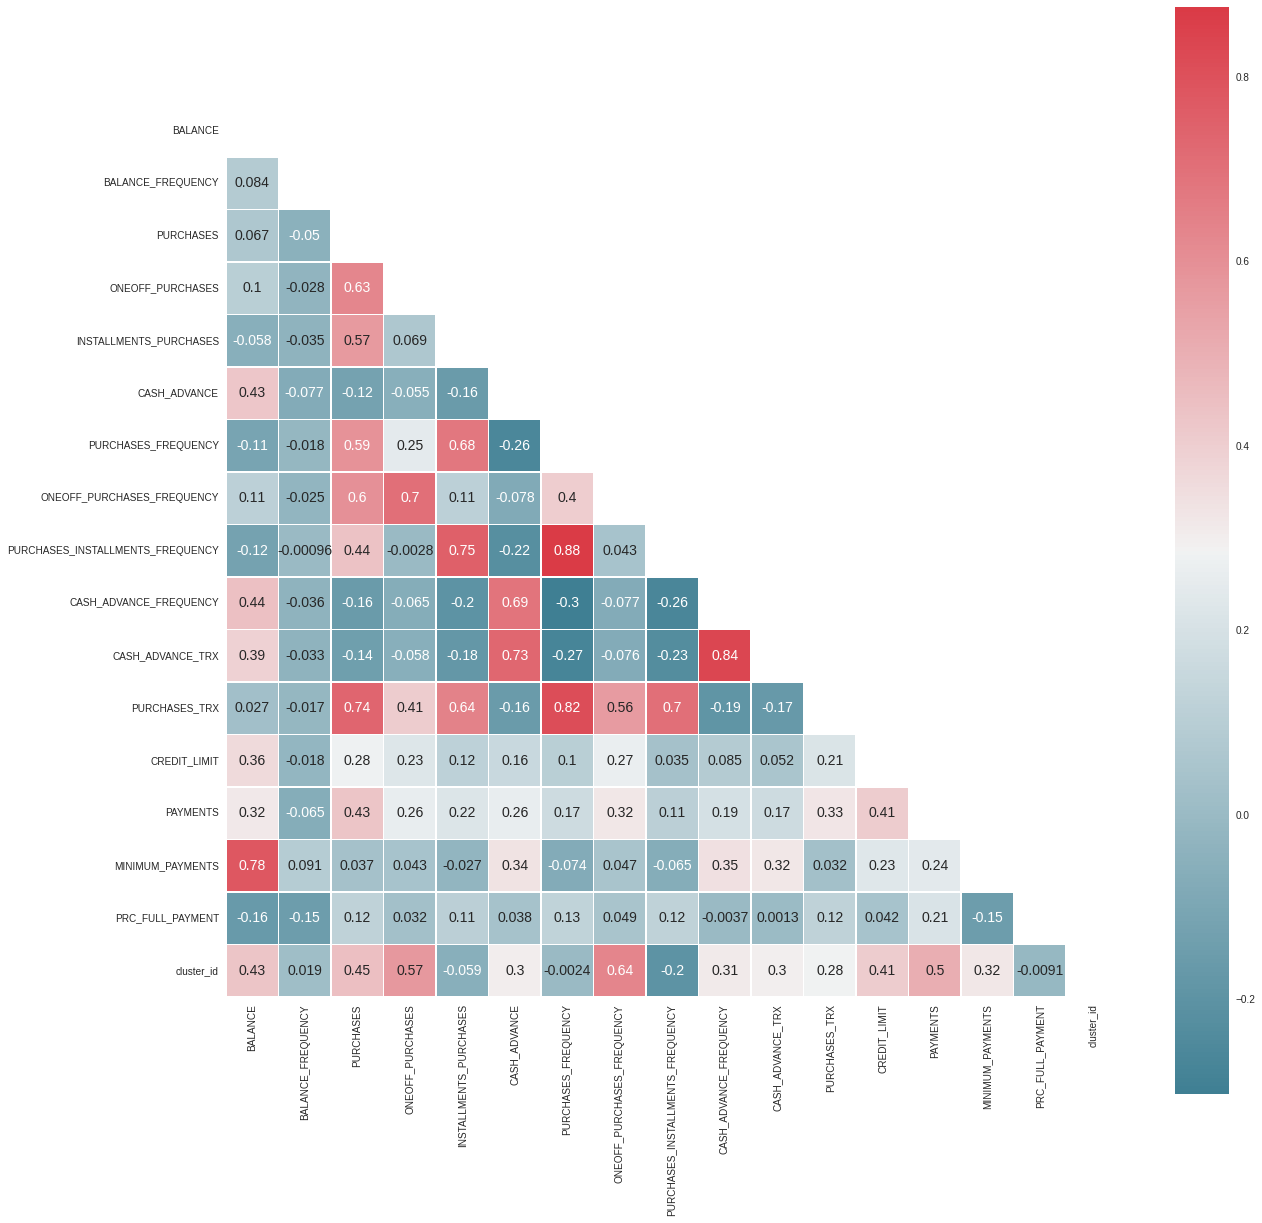

In [26]:
correlation = data_scale.corr(method='pearson')
fig, ax = plt.subplots()
ax.figure.set_size_inches(20, 20)
mask = np.triu(np.ones_like(correlation, dtype=np.bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(correlation, cmap=cmap,mask=mask,  square=True, linewidths=.5, 
            annot=True, annot_kws={'size':14})
plt.show()

In [27]:
data_scale.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'cluster_id'],
      dtype='object')

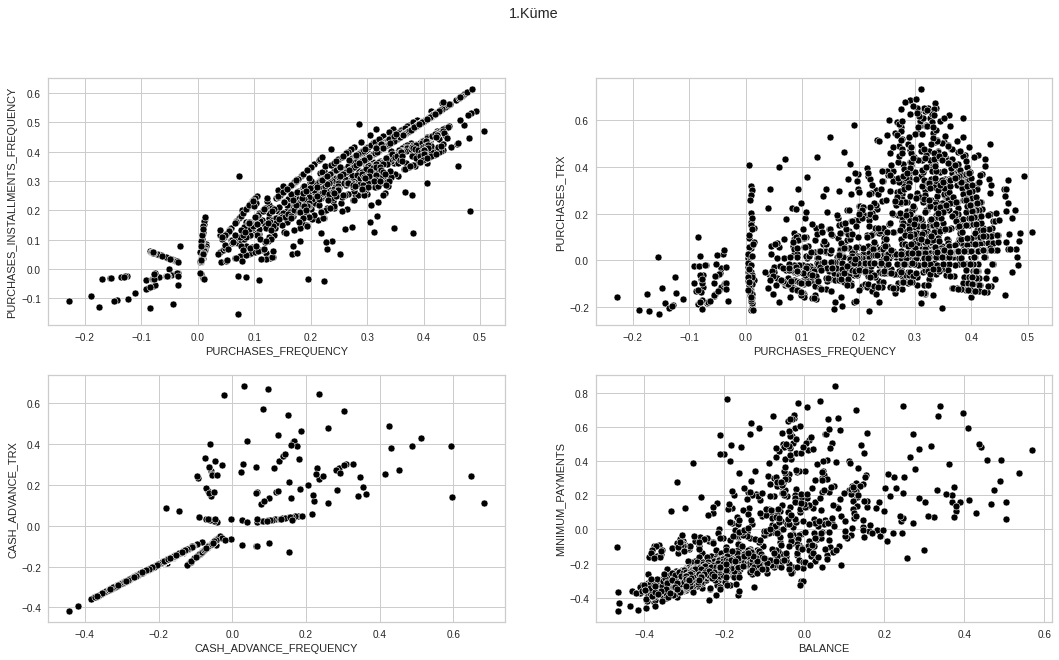

In [28]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

fig.suptitle('1.Küme')

sns.scatterplot(ax=axes[0, 0],x="PURCHASES_FREQUENCY", y="PURCHASES_INSTALLMENTS_FREQUENCY", data=data_scale[y_kmeans==0], color ='black')
sns.scatterplot(ax=axes[0, 1],x="PURCHASES_FREQUENCY", y="PURCHASES_TRX", data=data_scale[y_kmeans==0], color ='black')     
sns.scatterplot(ax=axes[1, 0],x="CASH_ADVANCE_FREQUENCY", y="CASH_ADVANCE_TRX", data=data_scale[y_kmeans==0], color ='black')          
sns.scatterplot(ax=axes[1, 1,],x="BALANCE", y="MINIMUM_PAYMENTS", data=data_scale[y_kmeans==0], color ='black')

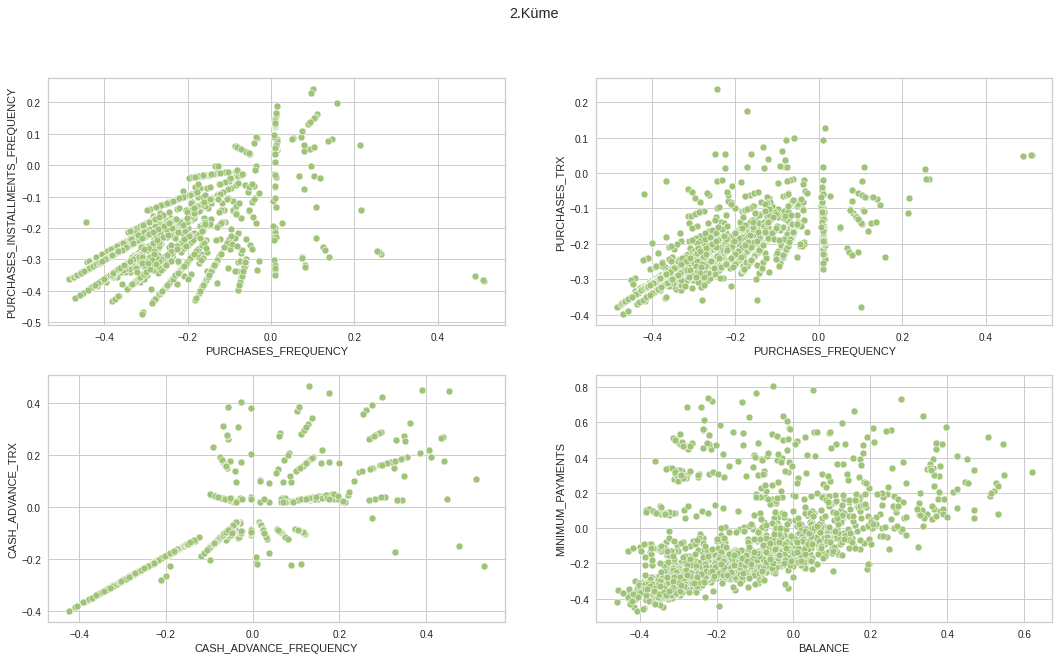

In [29]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

fig.suptitle('2.Küme')

sns.scatterplot(ax=axes[0, 0],x="PURCHASES_FREQUENCY", y="PURCHASES_INSTALLMENTS_FREQUENCY", data=data_scale[y_kmeans==1], color ='g')
sns.scatterplot(ax=axes[0, 1],x="PURCHASES_FREQUENCY", y="PURCHASES_TRX", data=data_scale[y_kmeans==1], color ='g')  
sns.scatterplot(ax=axes[1, 0],x="CASH_ADVANCE_FREQUENCY", y="CASH_ADVANCE_TRX", data=data_scale[y_kmeans==1], color ='g')  
sns.scatterplot(ax=axes[1, 1,],x="BALANCE", y="MINIMUM_PAYMENTS", data=data_scale[y_kmeans==1], color ='g')

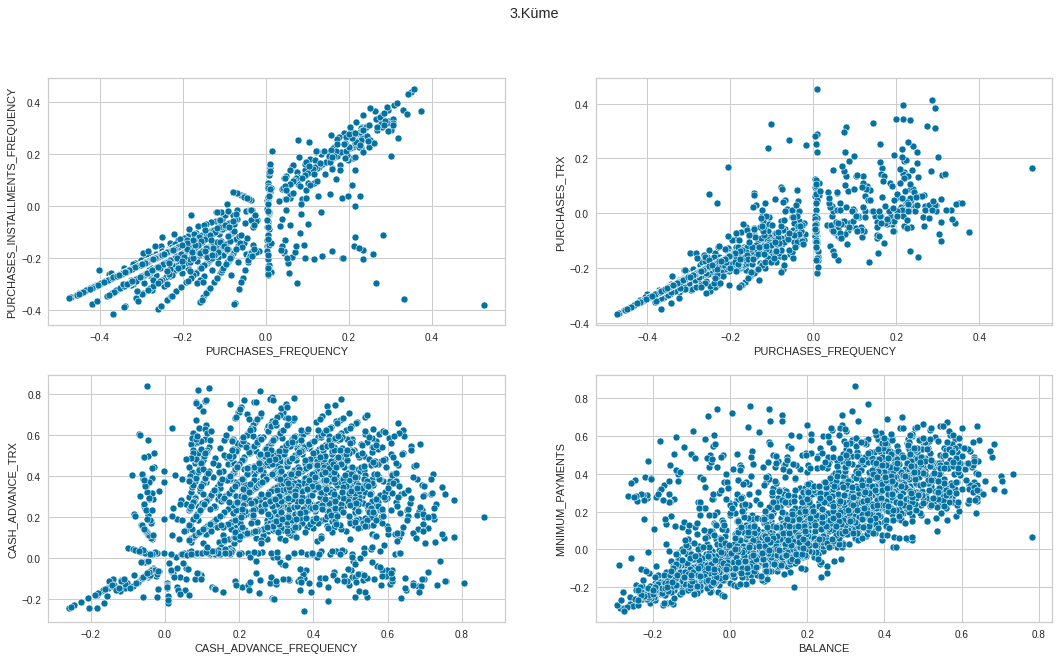

In [30]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

fig.suptitle('3.Küme')

sns.scatterplot(ax=axes[0, 0],x="PURCHASES_FREQUENCY", y="PURCHASES_INSTALLMENTS_FREQUENCY", data=data_scale[y_kmeans==2], color ='b')
sns.scatterplot(ax=axes[0, 1],x="PURCHASES_FREQUENCY", y="PURCHASES_TRX", data=data_scale[y_kmeans==2], color ='b')  
sns.scatterplot(ax=axes[1, 0],x="CASH_ADVANCE_FREQUENCY", y="CASH_ADVANCE_TRX", data=data_scale[y_kmeans==2], color ='b')  
sns.scatterplot(ax=axes[1, 1,],x="BALANCE", y="MINIMUM_PAYMENTS", data=data_scale[y_kmeans==2], color ='b')

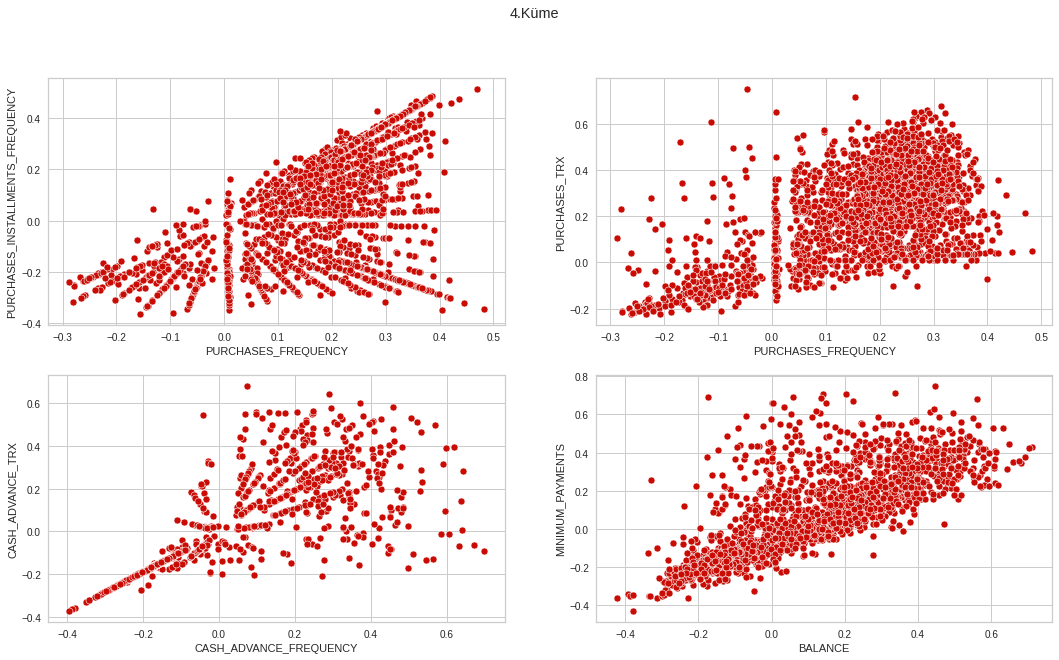

In [31]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

fig.suptitle('4.Küme')

sns.scatterplot(ax=axes[0, 0],x="PURCHASES_FREQUENCY", y="PURCHASES_INSTALLMENTS_FREQUENCY", data=data_scale[y_kmeans==3], color ='r')
sns.scatterplot(ax=axes[0, 1],x="PURCHASES_FREQUENCY", y="PURCHASES_TRX", data=data_scale[y_kmeans==3], color ='r')  
sns.scatterplot(ax=axes[1, 0],x="CASH_ADVANCE_FREQUENCY", y="CASH_ADVANCE_TRX", data=data_scale[y_kmeans==3], color ='r')  
sns.scatterplot(ax=axes[1, 1,],x="BALANCE", y="MINIMUM_PAYMENTS", data=data_scale[y_kmeans==3], color ='r')

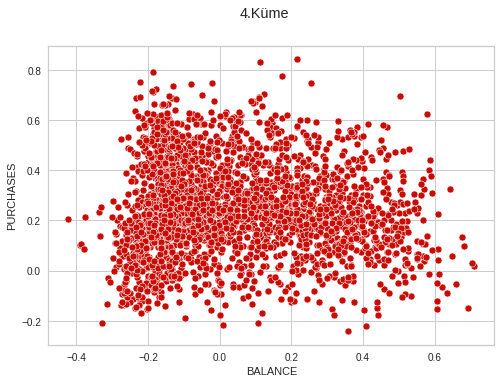

In [32]:
plt.suptitle("4.Küme")
sns.scatterplot(x="BALANCE", y="PURCHASES", data=data_scale[y_kmeans==3], color ='r')


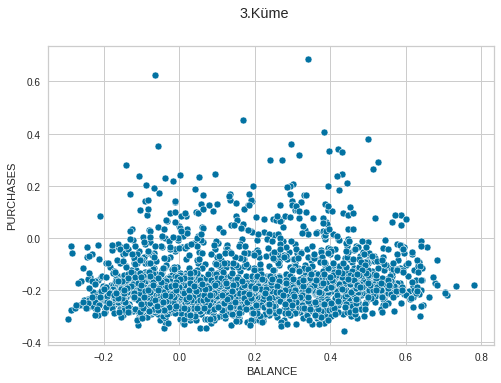

In [33]:
plt.suptitle("3.Küme")
sns.scatterplot(x="BALANCE", y="PURCHASES", data=data_scale[y_kmeans==2],color ='b')


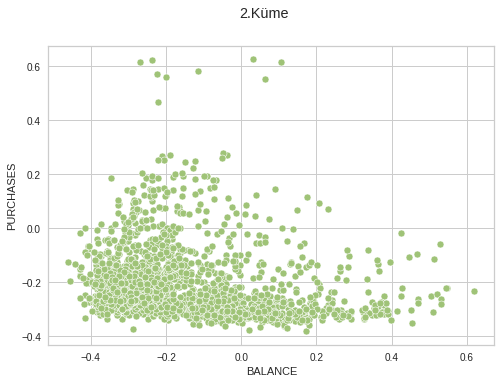

In [34]:
plt.suptitle("2.Küme")
sns.scatterplot(x="BALANCE", y="PURCHASES", data=data_scale[y_kmeans==1],color ='g')


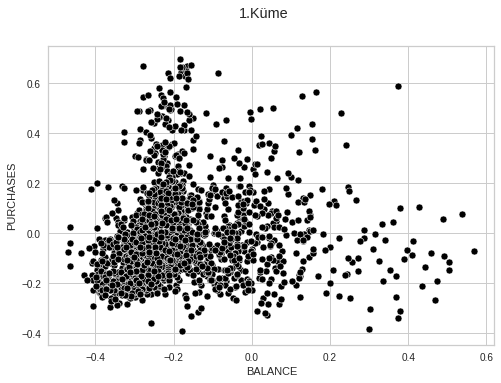

In [35]:
plt.suptitle("1.Küme")
sns.scatterplot(x="BALANCE", y="PURCHASES", data=data_scale[y_kmeans==0],color ='black')

In [36]:
cluster = cluster.replace(to_replace =0,value = "1.Küme, düşük bütçeli ve yüksek harcama yapanlar")
cluster = cluster.replace(to_replace =1,value = "2.Küme, düşük bütçeli ve tutumluluk yapanlar")
cluster = cluster.replace(to_replace =2,value = "3.Küme, ,yi Bütçeli ve yüksek harcama yapanlar ")
cluster = cluster.replace(to_replace =3,value = "4.Küme, yüksek Bütçeli ve nakit harcama yapanlar")

X_principal = pd.merge(X_principal, cluster, left_index=True, right_index=True)
print(X_principal)

            P1        P2                                        cluster_id
0    -0.317046 -0.546089      2.Küme, düşük bütçeli ve tutumluluk yapanlar
1    -0.371284  0.626472   3.Küme, ,yi Bütçeli ve yüksek harcama yapanlar 
2     0.362088  0.232069  4.Küme, yüksek Bütçeli ve nakit harcama yapanlar
3    -0.039067  0.189424  4.Küme, yüksek Bütçeli ve nakit harcama yapanlar
4    -0.559354 -0.606123      2.Küme, düşük bütçeli ve tutumluluk yapanlar
...        ...       ...                                               ...
8945  0.271293 -0.733149  1.Küme, düşük bütçeli ve yüksek harcama yapanlar
8946  0.262671 -0.674325  1.Küme, düşük bütçeli ve yüksek harcama yapanlar
8947  0.109441 -0.460095  1.Küme, düşük bütçeli ve yüksek harcama yapanlar
8948 -0.373004 -0.314647      2.Küme, düşük bütçeli ve tutumluluk yapanlar
8949  0.229477  0.117387  4.Küme, yüksek Bütçeli ve nakit harcama yapanlar

[8950 rows x 3 columns]


In [37]:
fig = px.scatter(X_principal, x='P1', y='P2',
                 color='cluster_id')
#fig.add_trace(go.Scatter(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], mode='markers',
#                         marker_color='rgba(152, 0, 0, .8)', marker_size=10, name='Centroids'))

fig.update_xaxes(title_text='P1')
fig.update_yaxes(title_text='P2')
fig.update_layout(height=1000, width=1200,
                  legend_title_text='Clusters',
                  title_text='K-Means with 4 Clusters')

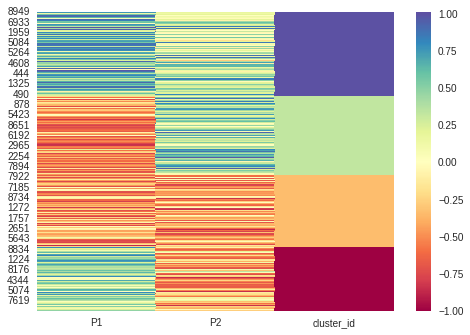

In [38]:
forvisual['cluster_id'] = forvisual['cluster_id'].div(3/2)
forvisual['cluster_id'] = forvisual['cluster_id'].sub(1)
sns.heatmap(forvisual.sort_values('cluster_id', ascending=False), cmap="Spectral")